# <center>Financial products discussed during the course</center>

<center>Today we will discuss the types of financial products used in the course</center>

## How can you protect yourself against large unexpected changes ?

Imagine that one year from now you will need to buy $10.000$ barrels of oil, and you can buy it from two companies: A and B.<br/>
Currently, the two prices are equal: $S_A(t=0)=S_B(t=0)=\$50$ per barrel, but they change over time.

1. If the code window below is open, then close it with the little triangle at its top left.

2. Click on the plot. Keep CTRL pressed down. Press down ENTER approximately 20 times. Each time check the "one year later" prices.

3. Observe that sometimes Price B has very big unexpected jumps compared to Price A.

4. Open the code, and turn on line numbering by pressing CTRL-M L (keep CTRL pressed down, press M, release CTRL, press L).

5. In line 10 of the code change the variable <tt>number_of_instances</tt> from 1 to 20. 

6. Close the code.

7. Click on the plot. Press CTRL-ENTER once.

8. Observe the set of all curves plotted for both prices.

In [2]:
# === Compare two prices over time. ===

# === Importing libraries. Setting plot dimensions. ===
import numpy as np
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(10, 6.18)) # resizing the figure

# === Parameters for plotting ===
number_of_instances = 20 # plot this number of instances for both prices
pow = 3 # the random walk is plotted with 10^pow steps on the [0,1] interval
n = int(np.power(10.0,pow)) # number of time points
rescaled_time_points = np.linspace(0, 1, n_points) # the list of n time points between 0 and 1
my_fontsize = 14 # font size for the plot
my_linewidth = 1 # setting plot line width

# === Constructing a rescaled Wiener process with n steps (n points) from a std. normal distribution ===
def price_A(n):
    random_steps_A = np.random.standard_normal(n) # n random steps, each selected from the given distribution
    cumulated_random_steps_A = np.cumsum(random_steps_A) # cumulated sum of the random steps
    rescaled_cumulated_random_steps_A = [ x / np.sqrt(n) for x in cumulated_random_steps_A ] # rescaling the cumulated steps
    return rescaled_cumulated_random_steps_A
    
# === Constructing a rescaled process with n steps from a different distribution  ===
def price_B(n):
    random_steps_B = np.random.standard_cauchy(n) # n random steps taken from another distribution
    cumulated_random_steps_B = np.cumsum(random_steps_B)
    rescaled_cumulated_random_steps_B = [ x / n for x in cumulated_random_steps_B ]
    return rescaled_cumulated_random_steps_B

# === Plotting ===
for num in np.arange(number_of_instances):
    plt.plot(rescaled_time_points, price_A(n), c='#00dd00', label="Price A", lw=my_linewidth)
    plt.plot(rescaled_time_points, price_B(n), c='#dd0000', label="Price B", lw=my_linewidth)
    if ( 0 == num ): # with the first instance of both curves, plot the legend
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=my_fontsize) # legend position, font size

# === Plot properties ===
my_fontsize = 14 # font size for the text of the current plot
plt.axhline(0, c='gray', ls='dotted') # horizontal zero axis, dotted
plt.ylabel('P r i c e  ( $S_{\ t}$ )\n', fontsize=my_fontsize) # x axis label
plt.xlabel('T i m e   ( t )', fontsize=my_fontsize) # x axis label

# === Plot ticks ===
ax = plt.gca() # gca: get current axes, access the properties of the plot
ax.set_xticks([0, 1])
ax.set_xticklabels(['Now','One year later'], fontsize=my_fontsize)
ax.set_yticks([-10,0,10])
ax.set_yticklabels(["$-10\%$  "," $S_0$    ","$+10\%$  "], fontsize=my_fontsize)
plt.tick_params(labelsize=my_fontsize) # tick label size
plt.show(); # display the entire plot

NameError: name 'n_points' is not defined

## Call option

### Option
An option is a financial product. You can buy an option to protect yourself against an unexpectedly high or low future price.

### Call or Put
If you need protection against a high price in the future, you buy a call option defined on the price. Put protects against low.


## How does a call option protect you against a very high price ?

If one year from now the price of oil is above $K=\$80$ and nothing else changes, then your company loses all its profits.
<br/>
In other words, $K$ is the highest price you can afford to pay for buying oil at $T=$ one year from now.


1. Buy now a call option to ensure that at time $T$ you pay <b>at most</b> the fixed price $K$. 

2. If at $T$ the price of oil, $S_T$, is below $K$, then your call option pays nothing and you will pay $S_T$ for the oil.

3. If $S_T>K$, then your call option pays $S_T-K$, so you will pay only $K$.

4. Run the code below to see your balance at different $S_T$ values.

5. Observe that the call option with maturity $T$ and strike $K$ is a financial product, you can buy it for $P$ amount of money.

6. Note also that this product is called a European call option.

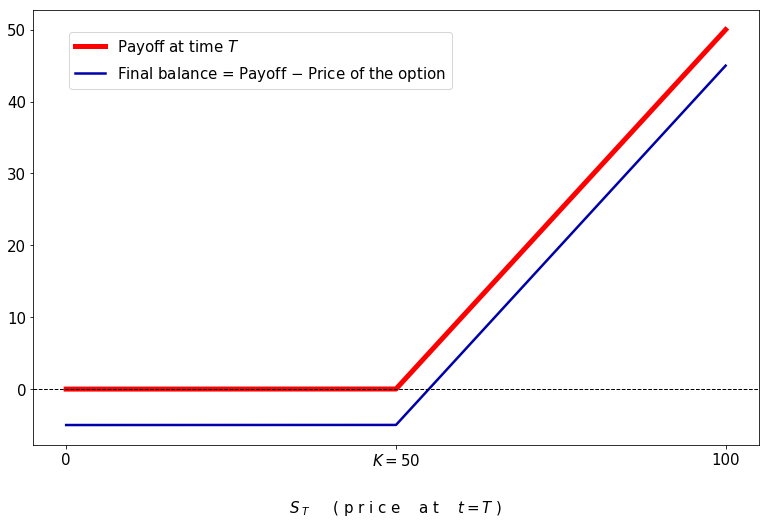

In [218]:
# === Call option payoff ===

# === Importing libraries and Setting values ===
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams # detailed parameter setting
plt.figure(figsize=(13, 8)) # resizing the figure
my_fontsize = 15
w = 5 # line width

# === Definitions ===
strike = 50 # strike price of the call option
call_price = 5 # This is only a dummy value for the price of the call option. We will calculate this price.
range_min = 0 # starting point of the range where payoff values are plotted
range_max = 2*strike # end point of the plotting range
step = 0.001 # step size of for plotting
x_axis = np.arange(range_min, range_max, step) # the list of underlying stock price values for which the payoff are computed
payoff_values = [ 0.0 if x < strike else x - strike for x in x_axis ]
total_balance = [ x - call_price for x in payoff_values ] # balance after including the price of the payoff

# === Plotting ===
plt.plot(x_axis, payoff_values, color='red', lw=w, label='Payoff at time $T$') # plot payoff values
plt.plot(x_axis, total_balance, color='#0000aa', lw=w/2, label='Final balance = Payoff $-$ Price of the option') # balance
plt.legend(bbox_to_anchor=(.05, .95), loc=2, borderaxespad=0., fontsize=my_fontsize) # legend position and font size
plt.xlabel('$S_{\ T}$     ( p r i c e    a t    $t = T$ ) ', labelpad=30, fontsize=my_fontsize) # set the x label of the plot
rcParams['axes.titlepad'] = 20 # moving the title a little further away from the plot
plt.tick_params(labelsize=my_fontsize) # tick parameter font size
ax = plt.gca() # gca: get current axes
plt.tick_params(labelsize=my_fontsize) # tick text font size
ax.axhline(linestyle='--',color='black',linewidth=1)
ax.set_xticks([range_min, strike, range_max])
ax.set_xticklabels([range_min,"$K=$"+str(strike),range_max])

# === Display the entire plot ===
plt.show() # display the entire plot